# Fashion MNIST Recognition with Tensorflow

In this notebook we will build Fashion MNIST recognition system in python using **tensorflow** library and **Fashion mnist** dataset.

### Import Tensor Flow Library


In [ ]:
# Import Tensor Flow Library
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

### Define CallBack class

In [4]:
# Create call back class and define the "on_epoch_end" function which will be called at the end of each epoch.
# In this function we are stopping the training as soon as accuracy will reach 95%.

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.95):
            print("\nTraining Cancelled on 95% of accuracy.")
            self.model.stop_training = True
callbacks = myCallback()

### Load Fashion MNIST Dataset

In [5]:
# Load Dataset and divide into Train and Test
fashion = tf.keras.datasets.fashion_mnist
(train_features, train_label), (test_features, test_label) = fashion.load_data()
# training_images : This array contains the images of training data.
# training_label : This array contains label for training data.
# test_images : This array contains images for test data.
# test_label : This array contains label for test data.

### Display Sample Images

Image as Array :  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

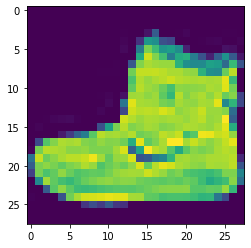

In [6]:
## Display sample images
INDEX = 0
plt.imshow(train_features[INDEX])
print("Image as Array : ", train_features[INDEX])
print("Label : ", train_label[INDEX])

### Normalize the Dataset

In [7]:
# Adding Depth of the Color and Normalize Datasets
# Reshape the dataset to add 4th dimention which represent the Depth of the image. 
# Since we are using Grey scale images it will be 1-Byte, which means the values for each pixel between 0-255.
# Normalize the Training Dataset.
norm_train_features = train_features.reshape(60000, 28, 28, 1) / 255.0
norm_test_features = test_features.reshape(10000, 28, 28, 1) / 255.0

### Define Neural Network

In [8]:
# Create Neural Network.
# Layers : 3 (Input, Hidden - 1, Output)
# Convolution Yes.
# Max Pooling : Yes.

nn_model = tf.keras.models.Sequential([
    # 16 : No of filters and (3,3) is dimention of the filter.
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Input Layer.
    tf.keras.layers.Flatten(),
    # First hidden layer.
    tf.keras.layers.Dense(128, activation='relu'),
    # Output layer.
    tf.keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### Explore Model Summary

In [9]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2704)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               346240    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 347,690
Trainable params: 347,690
Non-trainable params: 0
_________________________________________________________________


### Compile Neural Network

In [10]:
# Compile the NN
nn_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = [['accuracy', 'mse']])

### Train Neural Network

In [12]:
# Let's try to traing out Neural Network model.
# epoch : Here we using 10 epochs. Feel free to play with it and check the accuracy.
# callbacks : As per above definition of callback, it will stop training once the accuracy will reach 95%.

nn_model.fit(norm_train_features, train_label, epochs=10, callbacks=[callbacks])

Epoch 1/10
60000/60000 [==============================] - 12s 196us/sample - loss: 0.3990 - acc: 0.8571 - mean_squared_error: 27.6783
Epoch 2/10
60000/60000 [==============================] - 12s 200us/sample - loss: 0.2774 - acc: 0.8986 - mean_squared_error: 27.6850
Epoch 3/10
60000/60000 [==============================] - 12s 200us/sample - loss: 0.2358 - acc: 0.9125 - mean_squared_error: 27.6870
Epoch 4/10
60000/60000 [==============================] - 12s 194us/sample - loss: 0.2070 - acc: 0.9241 - mean_squared_error: 27.6884
Epoch 5/10
60000/60000 [==============================] - 13s 213us/sample - loss: 0.1794 - acc: 0.9337 - mean_squared_error: 27.6898
Epoch 6/10
60000/60000 [==============================] - 12s 204us/sample - loss: 0.1586 - acc: 0.9406 - mean_squared_error: 27.6908
Epoch 7/10
60000/60000 [==============================] - 12s 202us/sample - loss: 0.1394 - acc: 0.9485 - mean_squared_error: 27.6918
Epoch 8/10
59776/60000 [============================>.] - ETA:

### Evaluate Neural Network

In [14]:
# Evaluate the Model
nn_model.evaluate(norm_test_features, test_label)

10000/10000 [==============================] - 1s 77us/sample - loss: 0.2974 - acc: 0.9090 - mean_squared_error: 27.6923


[0.2973931317478418, 0.909, 27.692318]

## Prediction

### Check Sample Image on any Index

4


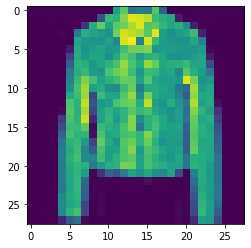

In [15]:
# Check the label of 10th Index Image. It looks like a shirt and label of the shirt is "4".
INDEX = 10
print (test_label[INDEX])
plt.imshow(test_features[INDEX])

### Check the Prediction

In [18]:
# Predict the Probability of the Images. check the Probablity at Index 10.
# You have seen that Image at INDEX : 10 is "shirt" whose label is represented as 4.
# Now lets try to predict using our Neural Network model.
# Since in the prediction you will get the probability of each number, 
# which means you will get list of 10 probabilities.
# argmax : Returns the indices of the maximum values along an axis.

prediction = np.argmax(nn_model.predict(norm_test_features)[INDEX])

print("Predicted value of image at Index : {0} is {1}.".format(INDEX, prediction))
# Note : label for shirt is 4, which means we have predicted correct value. 

Predicted value of image at Index : 10 is 4.


# THANK You : End of Fashion MNIST Recognition.